# Marina Leonard

# Taylor Swift Lyric Analysis

## Contents

This data was from shaynak on github

## Set Up

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Important functionality for this lesson
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split


In [4]:
original_lyric_df = pd.read_csv('data/taylor_lyrics_full.csv')

In [5]:
lyric_df = original_lyric_df.copy()

## Cleaning

### Removing unnecessary columns

In [6]:
lyric_df.nunique()

Title     257
Album      24
Lyrics    257
dtype: int64

### Duplicates

Check that there are no duplicate rows / songs. 

In [7]:
lyric_df.duplicated().sum()

0

However, in this database, there are no repeated lines. This must have been done before.

In [8]:
lyric_df.head()

,Title,Album,Lyrics
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan..."
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca..."
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...


In [9]:
print(f'There are {lyric_df.shape[0]} rows and {lyric_df.shape[1]} columns in this dataset.')

There are 257 rows and 3 columns in this dataset.


### Null and NA Values

In [10]:
lyric_df.isna().sum().sum()

0

In [11]:
lyric_df.isnull().sum().sum()

0

There are no NA or Null values

## EDA

### Albums

We can filter by albums.

In [12]:
number_of_albumns = lyric_df['Album'].nunique()

In [13]:
list_of_albumns = list(lyric_df['Album'].unique())

In [14]:
print(f'There are {number_of_albumns} albums in this Dataset')

print('They are :')

for item in list_of_albumns:
    print(item)

There are 24 albums in this Dataset
They are :
Taylor Swift
Beautiful Eyes
Fearless (Taylor's Version)
Speak Now (Taylor's Version)
Red (Taylor's Version)
1989 (Taylor's Version)
reputation
Lover
folklore
evermore
Midnights
The Tortured Poets Department
The Taylor Swift Holiday Collection
The Hunger Games
How Long Do You Think It's Gonna Last
Cats
Where The Crawdads Sing
Christmas Tree Farm
Fifty Shades Darker
Miss Americana
Love Drunk
Women in Music Part III
Two Lanes of Freedom
The Hannah Montana Movie


### Album with Most Songs

In [15]:
lyric_df['Album'].value_counts().sort_values(ascending=False)

Album
The Tortured Poets Department            31
Red (Taylor's Version)                   29
Fearless (Taylor's Version)              26
1989 (Taylor's Version)                  23
Midnights                                23
Speak Now (Taylor's Version)             22
Lover                                    19
folklore                                 17
evermore                                 17
reputation                               15
Taylor Swift                             14
The Taylor Swift Holiday Collection       6
Cats                                      2
Beautiful Eyes                            2
The Hunger Games                          2
How Long Do You Think It's Gonna Last     1
Where The Crawdads Sing                   1
Christmas Tree Farm                       1
Fifty Shades Darker                       1
Miss Americana                            1
Love Drunk                                1
Women in Music Part III                   1
Two Lanes of Freedom      

The album with the most songs is The Tortured Poets Department

### Album with longest average song by word

In [16]:
lyric_df['Song_word_length'] = lyric_df['Lyrics'].apply(lambda x : len(x.split(' ')))

In [17]:
lyric_df.head()

,Title,Album,Lyrics,Song_word_length
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218


In [18]:
lyric_df['Song_character_length'] = lyric_df['Lyrics'].apply(lambda x : len(x))
lyric_df.head()

,Title,Album,Lyrics,Song_word_length,Song_character_length
0,Tim McGraw,Taylor Swift,He said the way my blue eyes shined\nPut those...,314,1865
1,Picture to Burn,Taylor Swift,"State the obvious, I didn't get my perfect fan...",263,1586
2,Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...,258,1496
3,A Place In This World,Taylor Swift,"I don't know what I want, so don't ask me\n'Ca...",207,1130
4,Cold as You,Taylor Swift,You have a way of coming easily to me\nAnd whe...,218,1258


In [19]:
lyric_df.groupby('Album')['Song_word_length'].mean().sort_values(ascending=False)

Album
How Long Do You Think It's Gonna Last    439.000000
reputation                               424.866667
Two Lanes of Freedom                     402.000000
1989 (Taylor's Version)                  382.304348
Fifty Shades Darker                      369.000000
Speak Now (Taylor's Version)             353.681818
Red (Taylor's Version)                   338.517241
Lover                                    326.210526
Cats                                     308.000000
evermore                                 305.823529
Fearless (Taylor's Version)              302.192308
The Tortured Poets Department            300.000000
Midnights                                298.695652
Love Drunk                               279.000000
folklore                                 262.705882
Christmas Tree Farm                      252.000000
Miss Americana                           251.000000
Taylor Swift                             248.500000
Women in Music Part III                  216.000000
Beauti

The album with the longest average song by word count is 'How Long Do You Think It's Gonna Last' by Big Red Machine. The album with the longest average song by Taylor Swift is reputation.

### Most Common Words and Bigrams

In [ ]:
lyrics_only_df = lyric_df['Lyrics']

#### Single Words

In [28]:
# count vectorizer with no maximum number of tokens. 

count_v = CountVectorizer( min_df=1, stop_words='english')

# fit to the lyrics
count_v.fit(lyrics_only_df)

# transform

lyrics_transformed = count_v.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape of lyrics_only is {lyrics_transformed.shape}")


 The shape of lyrics_only is (257, 4618)


In [35]:
lyric_data = lyrics_transformed.todense()
lyric_words = count_v.get_feature_names_out()

In [36]:
total_lyrics_df = pd.DataFrame(data = lyric_data, columns= lyric_words)

In [38]:
total_lyrics_df.head()

,05,1500s,16th,17,1830s,1944,1950s,1958,2003,29th,...,yelling,yes,yesterday,yogurt,yon,york,young,younger,youth,zayn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

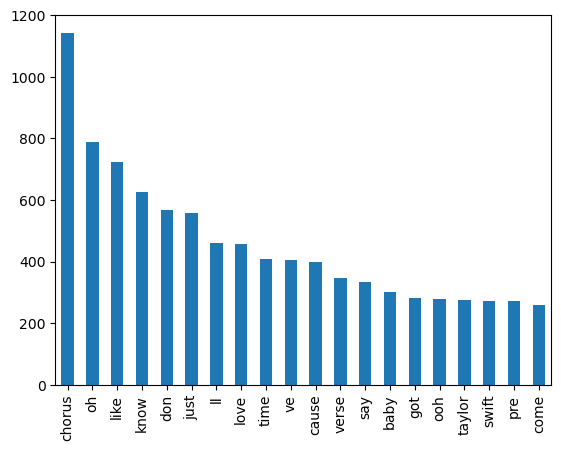

In [47]:
total_lyrics_df.sum().sort_values(ascending=False).head(20).plot(kind = 'bar')

#### Bigrams

In [54]:
# count vectorizer with no maximum number of tokens. 

count_v_bigram = CountVectorizer( max_features=500, min_df=1, stop_words='english', ngram_range=(2,2))

# fit to the lyrics
count_v_bigram.fit(lyrics_only_df)

# transform

lyrics_transformed_bigram = count_v_bigram.transform(lyrics_only_df)
# pos_X_test_transformed = pos_count_v.transform(pos_X_test)

# check shape - should be 500 columns and same rows as before
print(f" The shape is {lyrics_transformed_bigram.shape}")

 The shape is (257, 500)


In [55]:
lyric_data_bigram = lyrics_transformed_bigram.todense()
lyric_words_bigram = count_v_bigram.get_feature_names_out()

total_lyrics_df_bigram = pd.DataFrame(data = lyric_data_bigram, columns= lyric_words_bigram)

In [56]:
total_lyrics_df_bigram.sum().sort_values(ascending=False).head(20)

oh oh            302
taylor swift     273
pre chorus       272
post chorus      139
chorus taylor     98
ah ah             92
don know          91
ooh ooh           89
ve got            72
di di             72
don wanna         71
chorus cause      70
shake shake       58
come come         57
la la             50
wish wish         48
chorus oh         47
just wanna        46
chorus don        45
love love         42
dtype: int64

There are many repeated words. We need to take out 'chorus' as it will not be part of the lyrics. Also 'Taylor' and 'Swift'